# Mentoria: Monitoreo de Espacios Verdes

__DIPLODATOS 2022 - FAMAF UNC__

_Felix Rojo Lapalma_

## Exploración y Curación de Datos 

En esta etapa ya hemos avanzado en (basados en el [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb)):

- análisis y exploración del conjunto de datos (aunque sea superficialmente)
- set representativo: Es decir, aprendimos que podemos llegar a trabajar con un set mas reducido (de las caracteristicas - columnas del dataframe) e igualmente vamos a estar representando gran parte del conjunto.
- inputacion de valores:   
    - tenemos formas de inputar valores en rangos temporales que no tenemos (para una cierta zona) utilizando otros rangos temporales (aqui aprovechamos fuertemente la estacionalidad de lo que estamos monitoreando)
    - que un outlier en un rango temporal puede ser un valor nominal en otro rango temporal.

- etc

En lo que sigue vamos a aplicar mucho de lo obtenido en el TP anterior para "curar" nuestro dataset con diferentes recetas. Por curar nos referimos a generar los procesos necesarios (trazables y reproducibles) que nos lleven del conjunto original de datos (que debe permanecer inmutable) hasta un conjunto que pueda ser consumido por distintos algorimos de aprendizaje. Las recetas pasaran de las mas simples, hasta algunas mas elaboradas. Una de las intenciones de todo proceso de curacion es salvar, en base a ciertos supuestos, la mayor cantidad de datos (puesto que la recoleccion de los mismos, etc, suele ser un proceso costoso tanto en recursos como en tiempo, entre otras cosas).

### Fuentes

El presente trabajo práctico está inspirado en los correspondientes de:

- [jbergamasco2019](https://github.com/jbergamasco/DiploDatos2019)

- [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb)

Para una introducción un poco mas extensa respecto al origen de los datos y su procesamiento se pueden referir a :
- [ab-initio-data-build](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md)
- [ab-initio-analisis-visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-analisis-visualizacion.md)


## Sobre el Trabajo Requerido

Se propone la elaboración de un conjunto de procedimientos (\*.py o notebooks) que nos permitan partiendo del dataset original obtener uno nuevo y "curado".
Respecto a las recetas mencionadas, son las que van a dar origen a los distintos procedimientos y nos van a permitir inferir (ya en el proximo TP) la importancia del proceso de curación.

### Sobre las recetas

La idea de construccion de una receta es que pueda ser aprovechada cuando le llegue un set nuevo de datos. Tanto  para su transformacion para incorporarlos al set de entramiento como para su posible uso en inferencia.

__DISCLAIMER__: En lo siguiente vamos a presentar un numero limitado (~4) de recetas (para el problema en cuestión).

### ab-initio

- elija (basados en lo aprendido en el TP anterior) un conjunto de bandas e indices que considere representativo. Adicione a su elección:
    - raster: raster del cual se extraen los estadísticos
    - clouds_on_raster: nubosidad del raster completo
    - osm_id: identificador asociado a la capa original (atlas-espacios-verdes)
    - area_m2: area en metros cuadrados
    - date: fecha de la muestra.
    
    estas variables las sumamos a los efectos practicos de representacion y filtrado.



### [A] Esfuerzo Nulo

- Leer los datos

In [1]:
# Setup necesario para correr pandas profiling
!pip install --upgrade pip
#!pip install pandas_profiling==2.8.0
!pip install pandas-profiling[notebook]

!pip install pandas_profiling  
# Run this from Jupytor notebook Ignore the warnings if any 
from pandas_profiling import ProfileReport 
#restart the kernel if throws error

########################################
# Importación necesaria para correr pandas profiling y descargar reporte
from pandas_profiling import ProfileReport
##from google.colab import files
########################################
# Descarga de base de datos
 #from link @ https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md
#########################################
!pip install gdown
!pip install missingno
!pip install statsmodels

In [2]:
# Descarga de archivo
!gdown https://drive.google.com/file/d/1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd
To: C:\Users\Varios\Mentoria - practicos\espacios-verdes-indexs-cba-20170101-20220420.zip

  0%|          | 0.00/170M [00:00<?, ?B/s]
  0%|          | 524k/170M [00:00<01:48, 1.57MB/s]
  1%|          | 1.05M/170M [00:00<01:49, 1.54MB/s]
  1%|          | 1.57M/170M [00:01<01:51, 1.51MB/s]
  1%|1         | 2.10M/170M [00:01<01:50, 1.52MB/s]
  2%|1         | 2.62M/170M [00:01<01:51, 1.50MB/s]
  2%|1         | 3.15M/170M [00:02<01:50, 1.51MB/s]
  2%|2         | 3.67M/170M [00:02<01:50, 1.51MB/s]
  2%|2         | 4.19M/170M [00:02<01:50, 1.50MB/s]
  3%|2         | 4.72M/170M [00:03<01:48, 1.53MB/s]
  3%|3         | 5.24M/170M [00:03<01:44, 1.58MB/s]
  3%|3         | 5.77M/170M [00:03<01:42, 1.60MB/s]
  4%|3         | 6.29M/170M [00:04<01:42, 1.61MB/s]
  4%|4         | 6.82M/170M [00:04<01:40, 1.62MB/s]
  4%|4         | 7.34M/170M [00:04<01:40, 1.62MB/s]
  5%|4         | 7.86M/170M [00:05<01:41, 1.60MB/s]
 

In [3]:
# Carga de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates # Esto sirve para manipular fechas en los gráficos
import matplotlib.pyplot as plt
import datetime
######
from pylab import rcParams
#####
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
df_=pd.read_csv("C:/Users/Varios/Desktop/Diplodatos/Mentoria/espacios-verdes-indexs-cba-20170101-20220420.zip",index_col=0)
display(df_.head())

# Lectura de csv y obtención de dataframe 
#df_=pd.read_csv(r"C:\Users\Sebastian\Documents\buckup 20-4-2021\4- Data Science\Diplo FAMAF\Espacios verdes\espacios-verdes-indexs-cba-20170101-20220420.zip", index_col=0)
#df_

,B02_min,B02_max,B02_mean,B02_median,B02_nodata,B02_range,B02_count,B03_min,B03_max,B03_mean,...,sipi_median,sipi_nodata,sipi_range,sipi_count,raster,clouds_on_raster,osm_id,name,area_m2,date
0,0.0871,0.1421,0.102570,0.09650,0.0,0.0550,47,0.0768,0.1516,0.098885,...,0.884216,0.0,0.453065,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,605976736,NaN,4650.710032,2017-01-03
1,0.0970,0.1936,0.118354,0.10660,0.0,0.0966,13,0.1006,0.1949,0.122154,...,0.971875,0.0,0.247045,13,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322368,NaN,1502.000513,2017-01-03
2,0.0992,0.1273,0.111805,0.11290,0.0,0.0281,19,0.1037,0.1369,0.117795,...,0.973017,0.0,0.207006,19,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322369,NaN,2004.192528,2017-01-03
3,0.0995,0.1933,0.118491,0.11355,0.0,0.0938,66,0.0993,0.1990,0.124512,...,0.966202,0.0,0.258424,66,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328111,NaN,6940.507640,2017-01-03
4,0.1059,0.1385,0.122453,0.12240,0.0,0.0326,47,0.1036,0.1580,0.132455,...,0.993986,0.0,0.260419,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328112,NaN,4587.356048,2017-01-03


In [5]:
df_.info()
df_.shape
df_.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208932 entries, 0 to 208931
Columns: 167 entries, B02_min to date
dtypes: float64(140), int64(24), object(3)
memory usage: 267.8+ MB


Index(['B02_min', 'B02_max', 'B02_mean', 'B02_median', 'B02_nodata',
       'B02_range', 'B02_count', 'B03_min', 'B03_max', 'B03_mean',
       ...
       'sipi_median', 'sipi_nodata', 'sipi_range', 'sipi_count', 'raster',
       'clouds_on_raster', 'osm_id', 'name', 'area_m2', 'date'],
      dtype='object', length=167)

- Extraer las columnas de interes (## ab-initio)

In [6]:
# Creamos un nuevo dataframe con las columnas de interés 
df_interest_A1 = df_[["B02_median", "B06_median", "B11_median","osm_id", "date", "ndvi_max", "area_m2","raster","clouds_on_raster"]]
len(df_interest_A1)
df_interest_A1.shape
df_interest_A1=pd.DataFrame(df_interest_A1)

In [7]:
df_interest_A1["id"] = df_interest_A1.index + 1
df_interest_A1['date']= pd.to_datetime(df_interest_A1['date'])
df_interest_A1['date1'] = df_interest_A1['date']
df_interest_A1['month'] = df_interest_A1['date'].dt.month
df_interest_A1 = df_interest_A1.set_index('date')
df_interest_A1

,B02_median,B06_median,B11_median,osm_id,ndvi_max,area_m2,raster,clouds_on_raster,id,date1,month
date,,,,,,,,,,,
2017-01-03,0.09650,0.19910,0.18770,605976736,0.630881,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,2017-01-03,1
2017-01-03,0.10660,0.25960,0.25420,559322368,0.630041,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,2,2017-01-03,1
2017-01-03,0.11290,0.25550,0.24640,559322369,0.622036,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,3,2017-01-03,1
2017-01-03,0.11355,0.29300,0.26675,559328111,0.669891,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,4,2017-01-03,1
2017-01-03,0.12240,0.29460,0.28950,559328112,0.619112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,5,2017-01-03,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-17,0.11270,0.20520,0.18950,307532496,0.563955,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208928,2022-04-17,4
2022-04-17,0.13665,0.23835,0.27315,307535460,0.490798,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208929,2022-04-17,4
2022-04-17,0.10625,0.22425,0.22230,307796387,0.566516,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208930,2022-04-17,4


<Figure size 576x396 with 0 Axes>

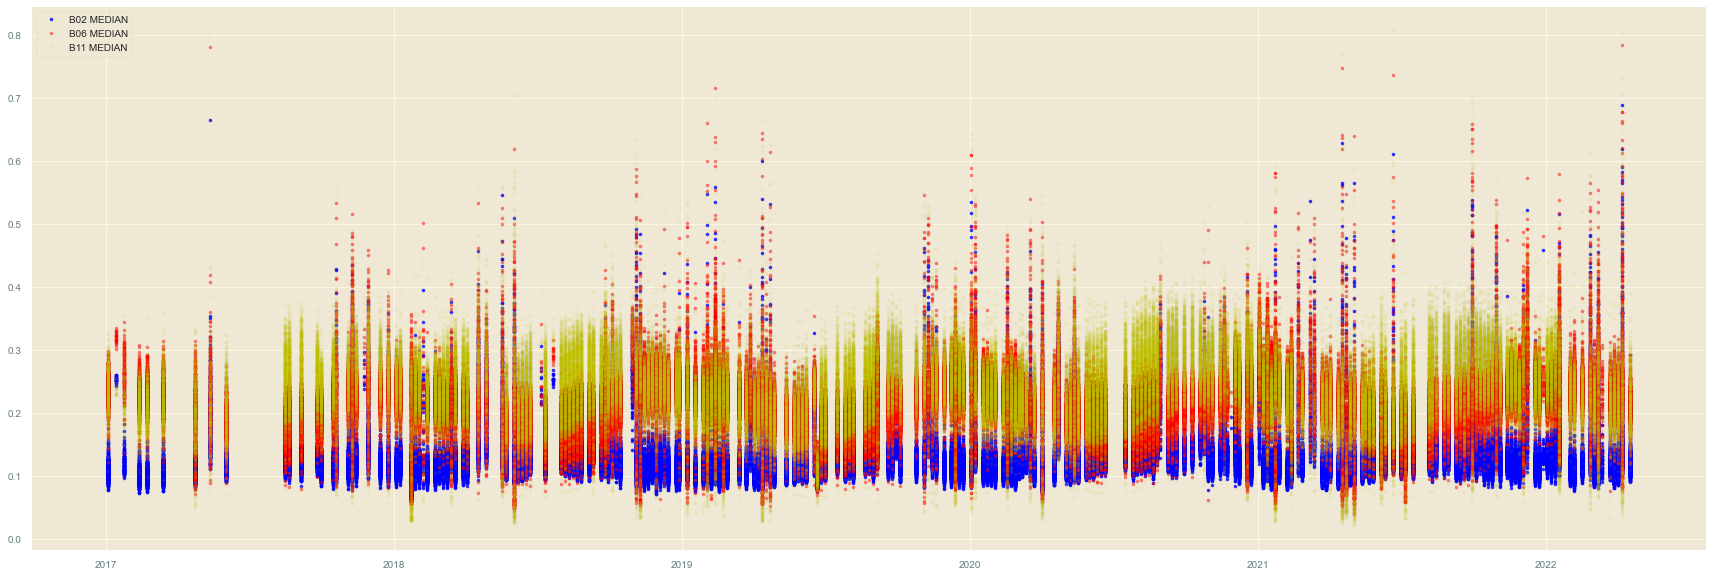

<Figure size 576x396 with 0 Axes>

In [8]:
plt.figure(figsize=(30,10))
from matplotlib import style
########  
# using the style for the plot
plt.style.use('Solarize_Light2')
########  
plt.plot(df_interest_A1['B02_median'], 'b.', label = 'B02 MEDIAN',linewidth=0.5,alpha=0.8)
plt.plot(df_interest_A1['B06_median'], 'r.', label = 'B06 MEDIAN',linewidth=0.5,alpha=0.5)
plt.plot(df_interest_A1['B11_median'], 'y.', label = 'B11 MEDIAN',linewidth=0.5,alpha=0.1)
plt.legend()
plt.figure()

<Figure size 576x396 with 0 Axes>

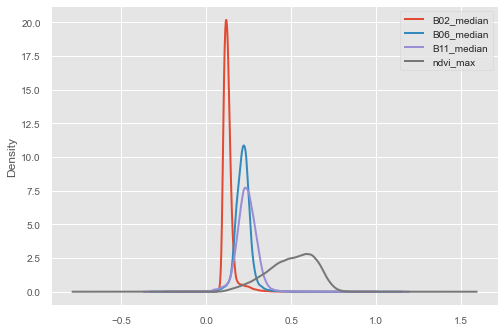

<Figure size 576x396 with 0 Axes>

In [9]:
#densidades de las variables asociadas a las bandas
plt.style.use('ggplot')
df_interest_A1['B02_median'].plot.kde()
df_interest_A1['B06_median'].plot.kde()
df_interest_A1['B11_median'].plot.kde()
df_interest_A1['ndvi_max'].plot.kde()
plt.legend()
plt.figure()

<Figure size 576x396 with 0 Axes>

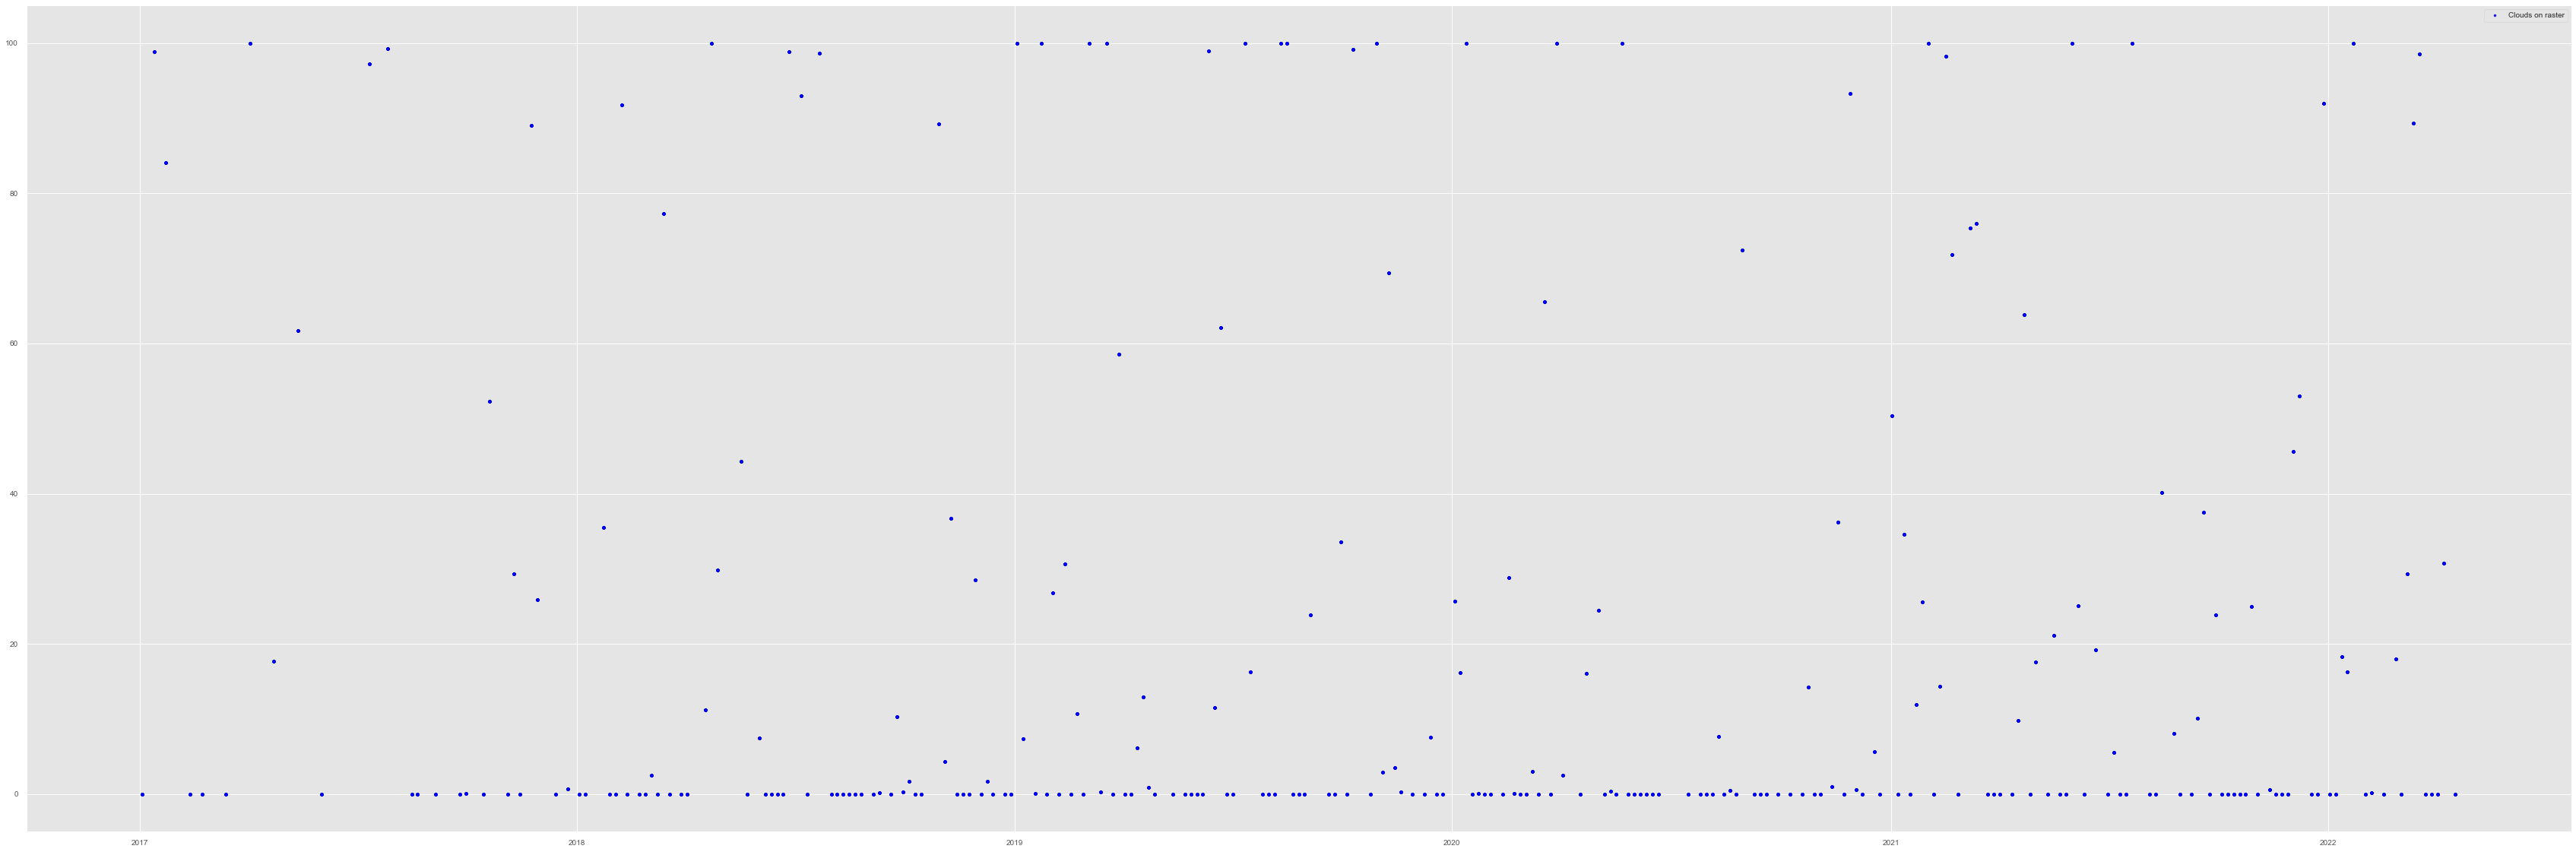

<Figure size 576x396 with 0 Axes>

In [10]:
plt.style.use('ggplot')
plt.figure(figsize=(60,20))
plt.plot(df_interest_A1['clouds_on_raster'], 'b.', label = 'Clouds on raster',linewidth=1,alpha=0.9)
plt.legend()
plt.figure()

<Figure size 576x396 with 0 Axes>

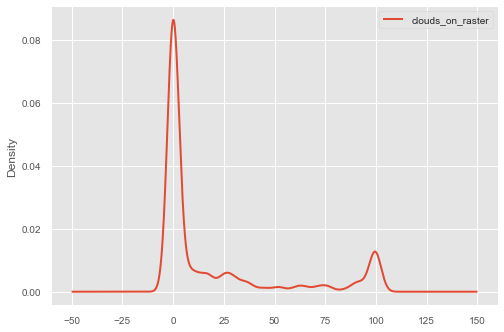

<Figure size 576x396 with 0 Axes>

In [11]:
##densidad de la variable "clouds on raster"
df_interest_A1['clouds_on_raster'].plot.kde()
plt.legend()
plt.figure()

In [12]:
# Utilizamos la librería missingno para el análisis de datos faltantes 
import missingno as msno

<AxesSubplot:>

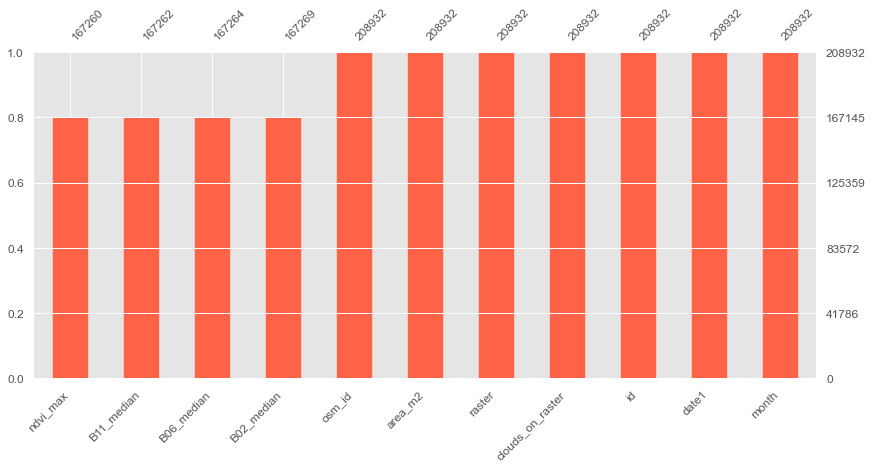

In [13]:
# Graficamos los datos faltantes de varias variables, incluidas las de interés
msno.bar(df_interest_A1,figsize=(14,6), sort="ascending",fontsize=12, color='tomato') 

<AxesSubplot:>

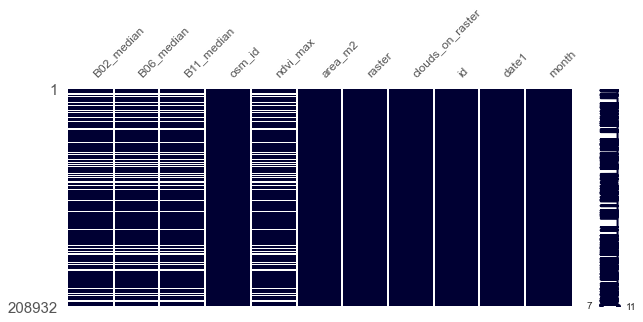

In [14]:
msno.matrix(df_interest_A1,figsize=(10, 4), fontsize=12, color=[0,0,0.2])

## Sugerencia

Considere cada paso de la receta como una función. Es decir al finalizar una receta tendra tantas funciones como pasos. Esto le va a permitir reordenar y reutilizar las mismas sin necesidad de reescribir ningun codigo extra. Esto le sera particularmente util para una de las preguntas de la siguiente sección.


## Recetas + Comparativa

Una vez generadas las recetas se debera generar una suerte de tabla comparativa entre las mismas, poniendo de relevancia la cantidad de datos desechados/recuperados en cada instancia. _Note que todos las recetas tienen un mismo eje_.

¿Cual es su percepcion de como resultaran cada una de las recetas en un algoritmo de aprendizaje?

¿Que pasa si en la receta [C] o [D] primero filtra por nubosidad y despues remueve outliers? Considere esto como variante y definalo como [C-1] y [C-2] ([D-1]/[D-2]).

## __Extra__

Generar alguna receta alternativa, basada en las propuestas mencionadas (o alguna completamente diferente :-) ).

In [15]:
# Desarrollar aquí receta alternativa

Receta con descomposición de serie de tiempo

#Bajo esta alternativa se remueven los outliers a partir de las variaciones observadas en el componente "ruido" de la serie de tiempo.

#Primero se prueba con 5 métodos alternativos de imputación de valores nulos.

#Luego se descompone la serie en tendencia, estacionalidad y ruido suponiendo que está modelada de forma : aditiva  dado que la serie de tiempo sería estacionaria.

#El modelo aditivo es apropiado cuando la magnitud de las
#fluctuaciones estacionales de la serie no varıa al hacerlo la tendencia.

#y_i = t_i + s_i + n_i

#where y_i = el valor que asume la serie de tiempo en el momento i.
#t_i = el componente tendencia en el momento i -presenta las variaciones a largo plazo-.
#s_i = el componente estacional en el momento i -releja las variaciones a corto plazo-.
#n_i = el ruido en el momenot i.

#El modelo multiplicativo es apropiado cuando la magnitud de las
#fluctuaciones estacionales de la serie crece y decrece
#proporcionalmente con los crecimientos y decrecimientos
#de la tendencia, respectivamente.

#y_i = t_i * s_i * n_i
################################################################

In [16]:
# Dado que la lectura de datos y extracción de columnas ya se realizó anteriormente, generamos una copia
df_interest_extra2 = df_interest_A1.copy()
len(df_interest_extra2)

208932

In [17]:
from statsmodels.tsa import seasonal
import numpy as np
import pandas as pd

In [18]:
df_interest_extra2.describe()

,B02_median,B06_median,B11_median,osm_id,ndvi_max,area_m2,clouds_on_raster,id,month
count,167269.000000,167264.000000,167262.000000,2.089320e+05,167260.000000,2.089320e+05,208932.000000,208932.000000,208932.000000
mean,0.129623,0.217933,0.238991,4.343631e+08,0.501846,1.249388e+04,19.473638,104466.500000,6.221014
std,0.035332,0.044101,0.057024,2.141069e+08,0.137381,7.895730e+04,33.424013,60313.617559,3.566925
min,0.061900,0.040500,0.021300,1.331006e+06,-0.194614,4.225951e+02,0.000000,1.000000,1.000000
25%,0.110300,0.191700,0.204150,2.867065e+08,0.408413,2.066559e+03,0.000000,52233.750000,3.000000
50%,0.122800,0.217450,0.238100,3.596742e+08,0.516362,3.812182e+03,0.000000,104466.500000,6.000000
75%,0.137800,0.241400,0.274000,6.059767e+08,0.609126,6.644794e+03,25.009939,156699.250000,9.000000
max,0.689700,0.784500,0.806100,9.249657e+08,0.999486,1.370630e+06,100.000000,208932.000000,12.000000


La elección del método de imputación, requiere del conocimiento de la naturaleza del problema de los datos que faltan en el dataset a imputar. Como vimos en el práctico pasado, es posible que la falta de registros en este dataset sea debido a un error no aleatorio correspondiente a características no observadas. Esto acota la disponibilidad de métodos de imputación. Podríamos considerar el uso de técnicas como KNN (vecino más cercano). Sin embargo, para la imputación de valores faltantes en una variable dada, KNN define con mayor precisión los vecinos cercanos si se utilizan variables de soporte que contengan datos para el mismo registro donde faltan datos en la variable dada. En el caso de este dataset, lamentablemente, los registros que faltan para una variable, son los mismos que para las otras, impidiendo una estimación adecuada por KNN. Esto puede verse claramente en la siguiente gráfica.   
Bajo esta receta se prueba cuatro métodos alternativos y finalmente optamos por imputar por el método spline.

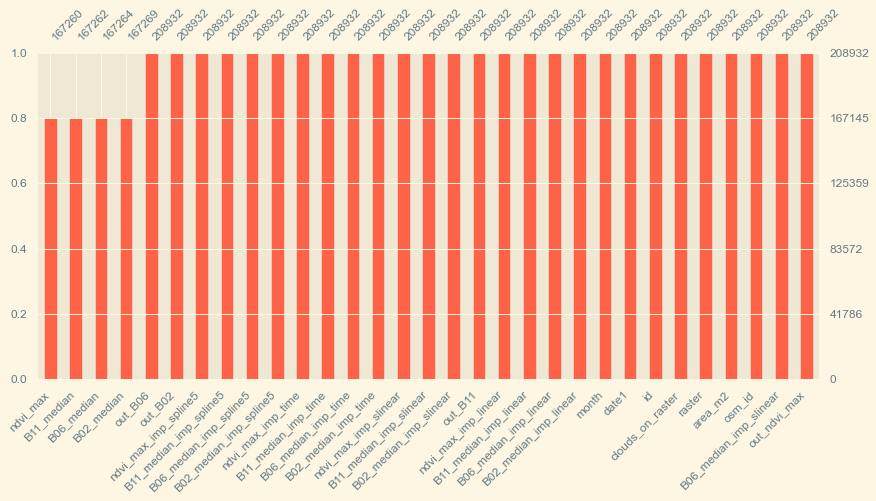

In [186]:
##Imputación de valores faltantes con métodos alternativos
#Interpolación lineal: Esta técnica se origina en el análisis numérico, que estima valores desconocidos asumiendo una relación lineal 
#dentro de un rango de puntos de datos, a diferencia de la extrapolación lineal, que estima datos fuera del rango de 
#los puntos de datos proporcionados. Para estimar los valores faltantes utilizando la interpolación lineal, observamos 
#los datos pasados y futuros del valor faltante. Ignora los índices y trata los datos como si estuvieran igualmente distribuidos
df_interest_extra2[['B02_median_imp_linear', 'B06_median_imp_linear','B11_median_imp_linear','ndvi_max_imp_linear']]=df_interest_extra2[['B02_median', 'B06_median','B11_median','ndvi_max']].interpolate(method='linear',limit_direction="both")    


#Interpolación slineal:  utiliza interpolación semilineal (se aproxima a una spline con grado1)
df_interest_extra2[['B02_median_imp_slinear', 'B06_median_imp_slinear','B11_median_imp_slinear','ndvi_max_imp_slinear']]=df_interest_extra2[['B02_median', 'B06_median','B11_median','ndvi_max']].interpolate(method='slinear',limit_direction="both")    


#Interpolación con método time trabaja sobre fechas e interpola dado el largo del intervalo (método time)
df_interest_extra2[['B02_median_imp_time', 'B06_median_imp_time','B11_median_imp_time','ndvi_max_imp_time']]=df_interest_extra2[['B02_median', 'B06_median','B11_median','ndvi_max']].interpolate(method='time')    

#########################
##Interpolación spline con grado 5: Spline utiliza un método de interpolación que estima valores usando una 
##función matemática que minimiza la curvatura general de la superficie, 
##lo que resulta en una superficie suave que pasa exactamente por los puntos de entrada.
df_interest_extra2[['B02_median_imp_spline5', 'B06_median_imp_spline5','B11_median_imp_spline5','ndvi_max_imp_spline5']]=df_interest_extra2[['B02_median', 'B06_median','B11_median','ndvi_max']].interpolate(method='spline',order=5,limit_direction="both")    
########
#######
df_interest_extra2
###########################
#####################
msno.bar(df_interest_extra2,figsize=(14,6), sort="ascending",fontsize=12, color='tomato') 
####
## se guarda el archivo con los datos imputados 
from pathlib import Path  
#filepath = Path('Resultado_tp1/DF.csv') 
filepath = Path('C:/Users/Varios/Desktop/Diplodatos/Resultado_receta_extra2_imputacion.csv') 
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_interest_extra2.to_csv(filepath) 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


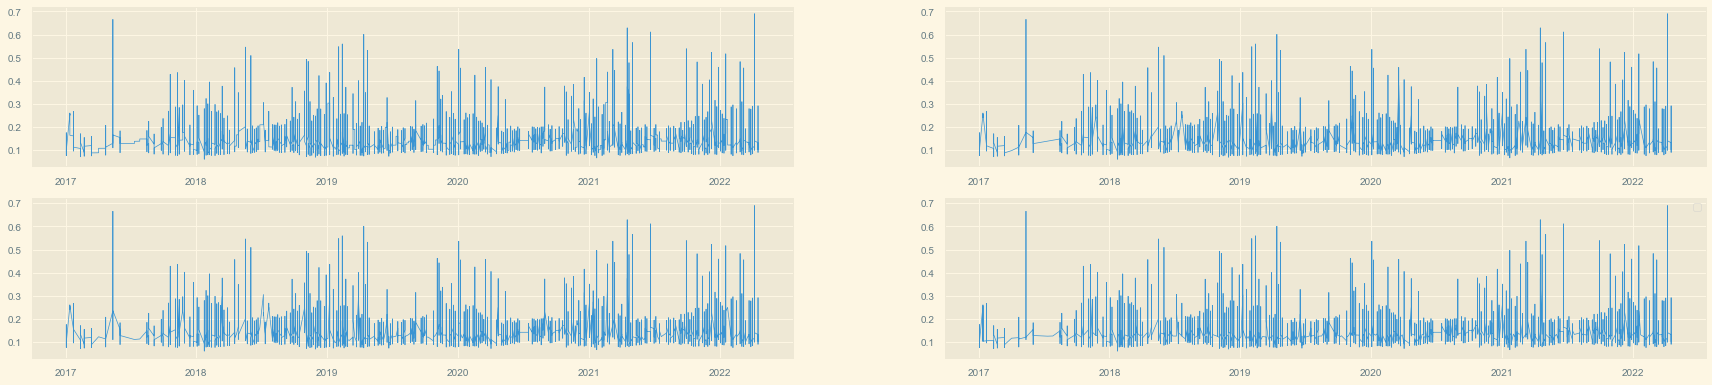

In [131]:
###Ejemplo de gráfico con imputaciones para B02_median
from matplotlib import style
###
####
plt.subplot(3,2,1)
plt.plot(df_interest_extra2['B02_median_imp_linear'],linewidth=0.7,alpha=0.9)
###
plt.subplot(3,2,2)
plt.plot(df_interest_extra2['B02_median_imp_slinear'],linewidth=0.7,alpha=0.9)
###
plt.subplot(3,2,3)
plt.plot(df_interest_extra2['B02_median_imp_time'],linewidth=0.7,alpha=0.9)
####
plt.subplot(3,2,4)
plt.plot(df_interest_extra2['B02_median_imp_spline5'],linewidth=0.7,alpha=0.9)

plt.legend()
plt.show()

In [95]:
df_interest_extra2.describe()

,B02_median,B06_median,B11_median,osm_id,ndvi_max,area_m2,clouds_on_raster,id,month,B02_median_imp_linear,...,B11_median_imp_time,ndvi_max_imp_time,B02_median_imp_spline5,B06_median_imp_spline5,B11_median_imp_spline5,ndvi_max_imp_spline5,out_B02,out_B06,out_B11,out_ndvi_max
count,167269.000000,167264.000000,167262.000000,2.089320e+05,167260.000000,2.089320e+05,208932.000000,208932.000000,208932.000000,208932.000000,...,208932.000000,208932.000000,208932.000000,208932.000000,208932.000000,208932.000000,208932.000000,208932.000000,208932.000000,208932.000000
mean,0.129623,0.217933,0.238991,4.343631e+08,0.501846,1.249388e+04,19.473638,104466.500000,6.221014,0.136633,...,0.238984,0.491309,0.129448,0.218004,0.238815,0.502826,0.083812,0.059086,0.041602,0.041722
std,0.035332,0.044101,0.057024,2.141069e+08,0.137381,7.895730e+04,33.424013,60313.617559,3.566925,0.042645,...,0.059990,0.144563,0.031723,0.039565,0.051152,0.123984,0.277106,0.235787,0.199679,0.199953
min,0.061900,0.040500,0.021300,1.331006e+06,-0.194614,4.225951e+02,0.000000,1.000000,1.000000,0.061900,...,0.021300,-0.194614,0.061900,0.040500,0.021300,-0.194614,0.000000,0.000000,0.000000,0.000000
25%,0.110300,0.191700,0.204150,2.867065e+08,0.408413,2.066559e+03,0.000000,52233.750000,3.000000,0.112100,...,0.202450,0.400407,0.113100,0.198900,0.212402,0.437878,0.000000,0.000000,0.000000,0.000000
50%,0.122800,0.217450,0.238100,3.596742e+08,0.516362,3.812182e+03,0.000000,104466.500000,6.000000,0.125843,...,0.236750,0.504539,0.126130,0.217450,0.238037,0.511299,0.000000,0.000000,0.000000,0.000000
75%,0.137800,0.241400,0.274000,6.059767e+08,0.609126,6.644794e+03,25.009939,156699.250000,9.000000,0.143450,...,0.276300,0.601955,0.135068,0.235900,0.264000,0.589623,0.000000,0.000000,0.000000,0.000000
max,0.689700,0.784500,0.806100,9.249657e+08,0.999486,1.370630e+06,100.000000,208932.000000,12.000000,0.689700,...,0.806100,0.999486,0.689700,0.784500,0.806100,0.999486,1.000000,1.000000,1.000000,1.000000


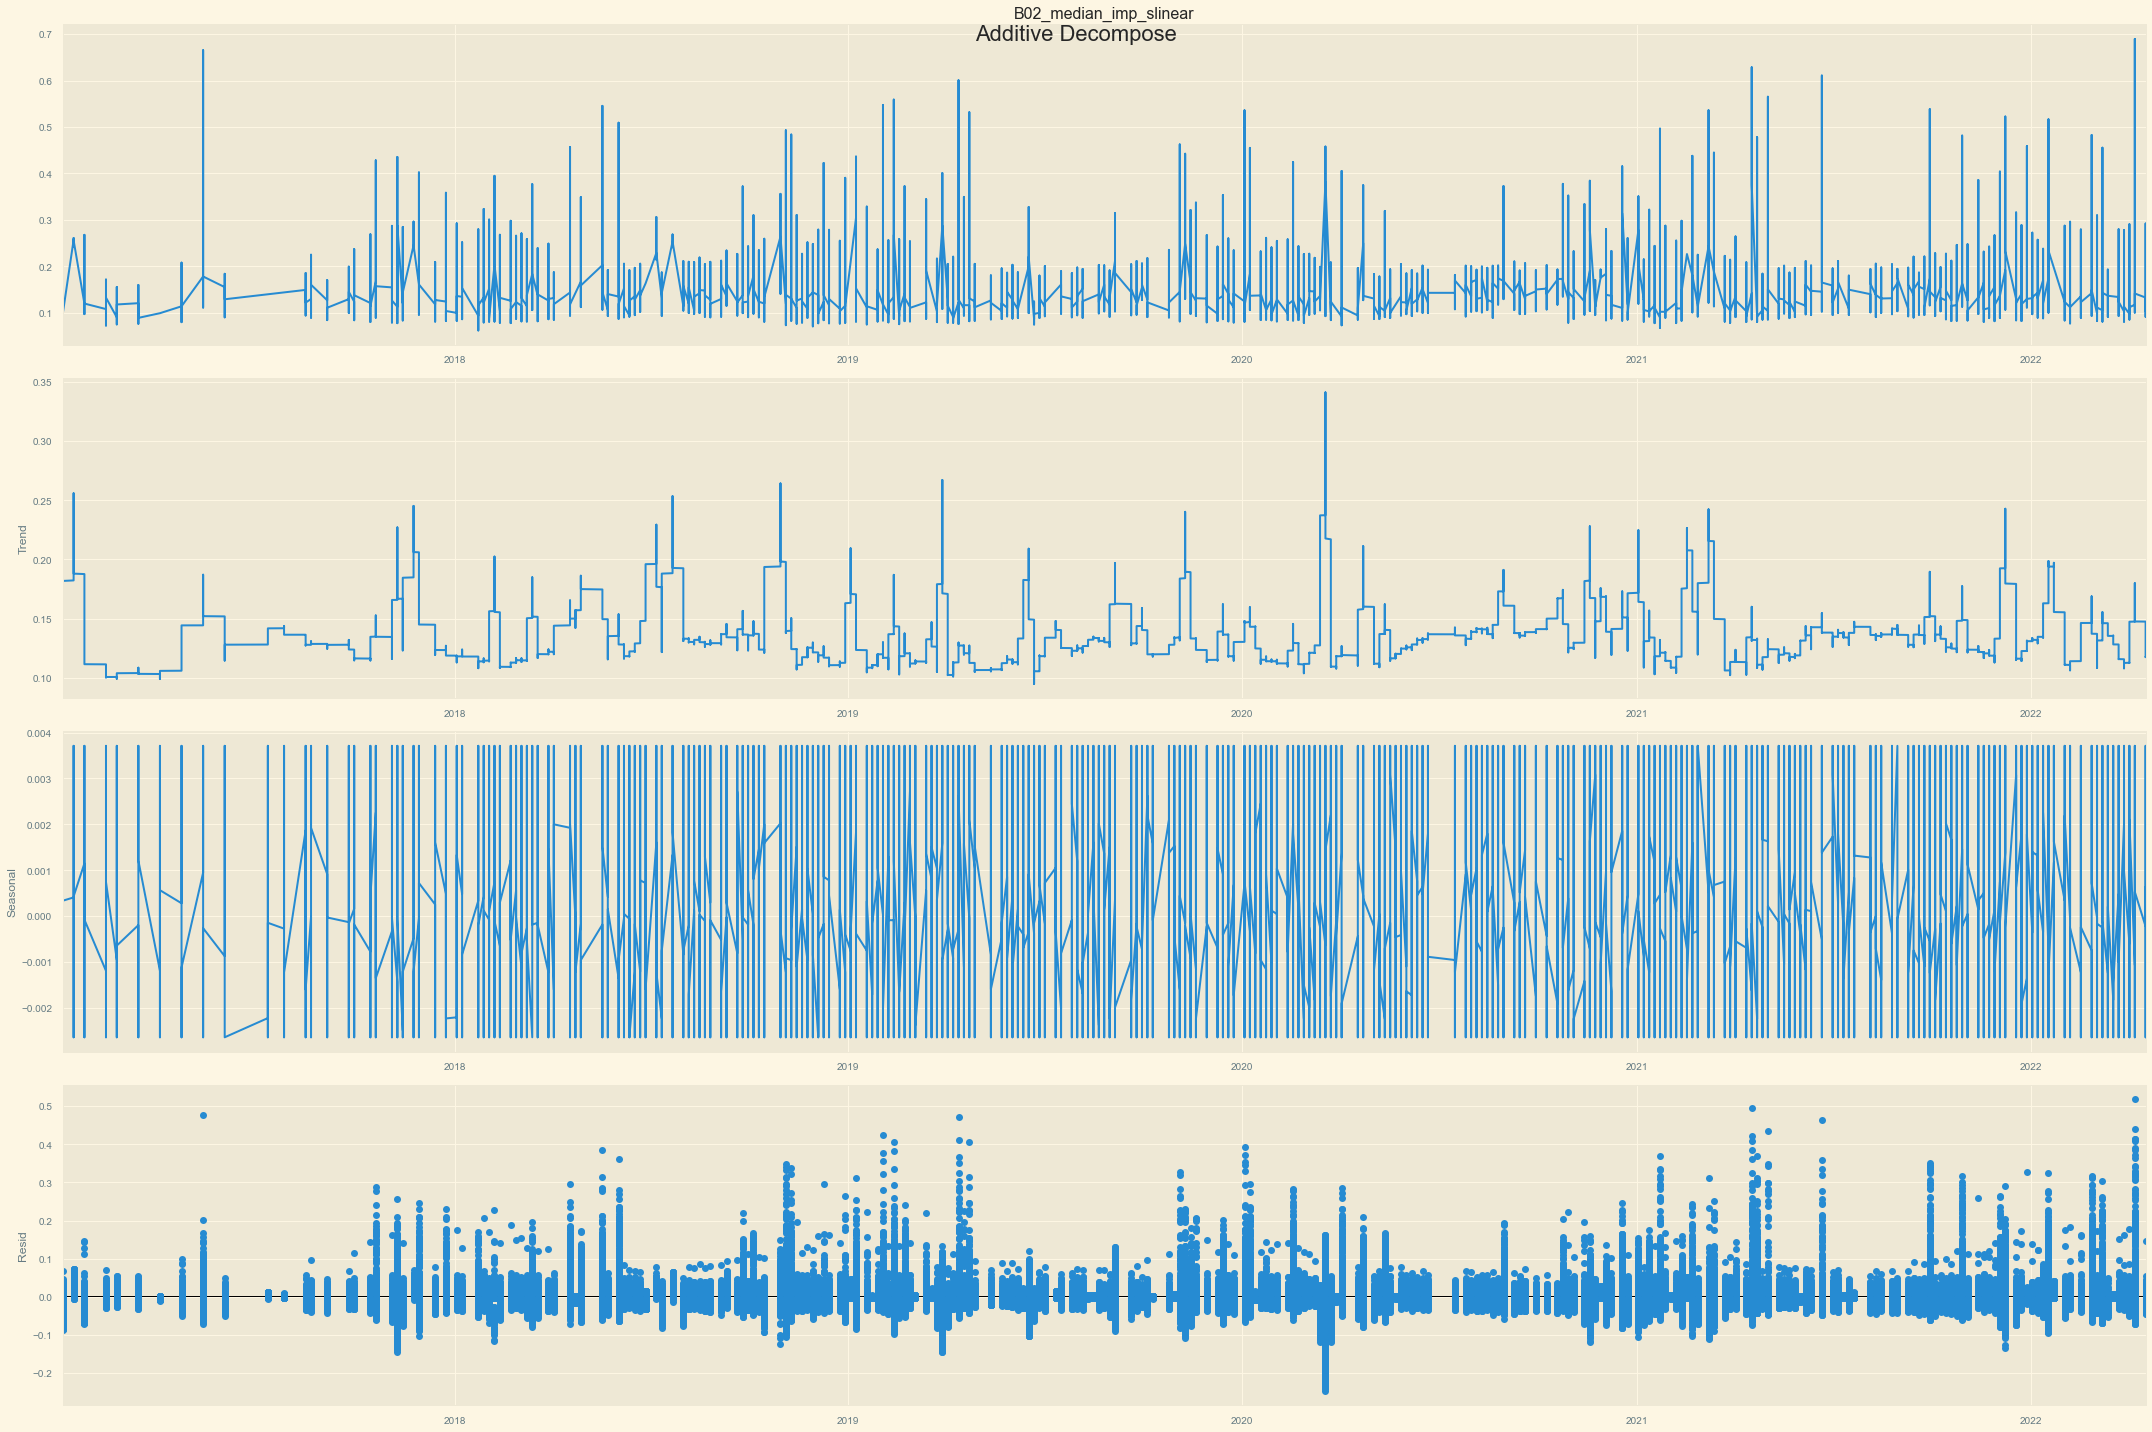

In [132]:
###Se aplica el método aditivo para descomponer las series utilizando la imputacion slinear ya que si no no funciona con NANs el método
# Additive Decomposition
result_add_B02 = seasonal.seasonal_decompose(df_interest_extra2['B02_median_imp_slinear'], model='additive',period=365)
# Plot
plt.rcParams.update({'figure.figsize': (30,20)})
result_add_B02.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

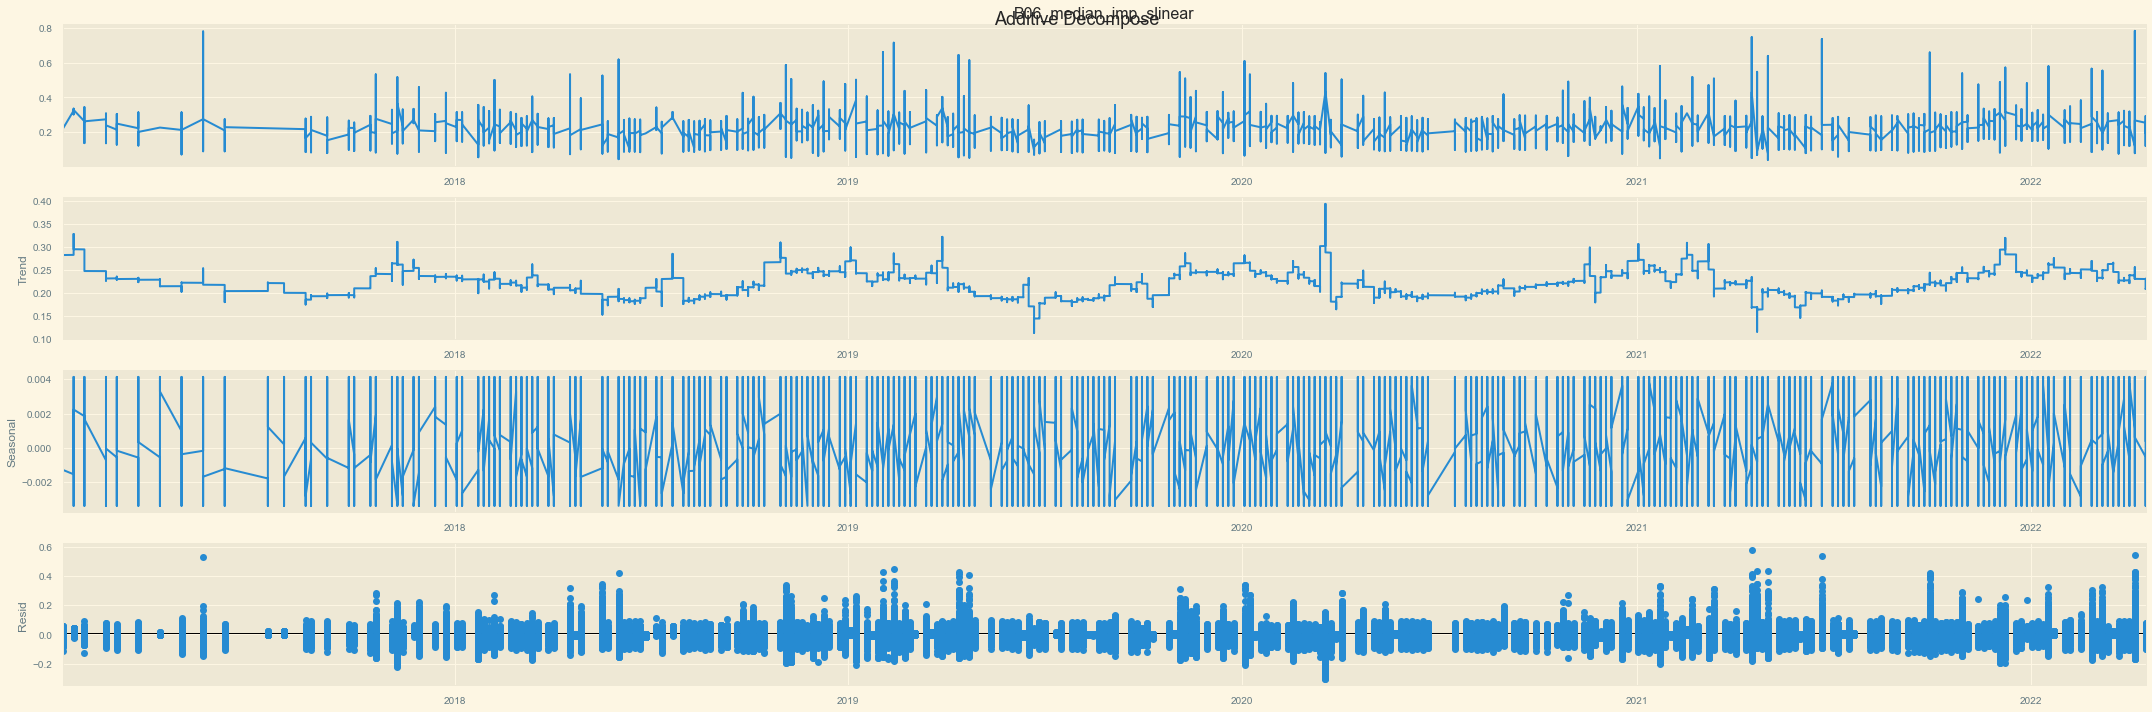

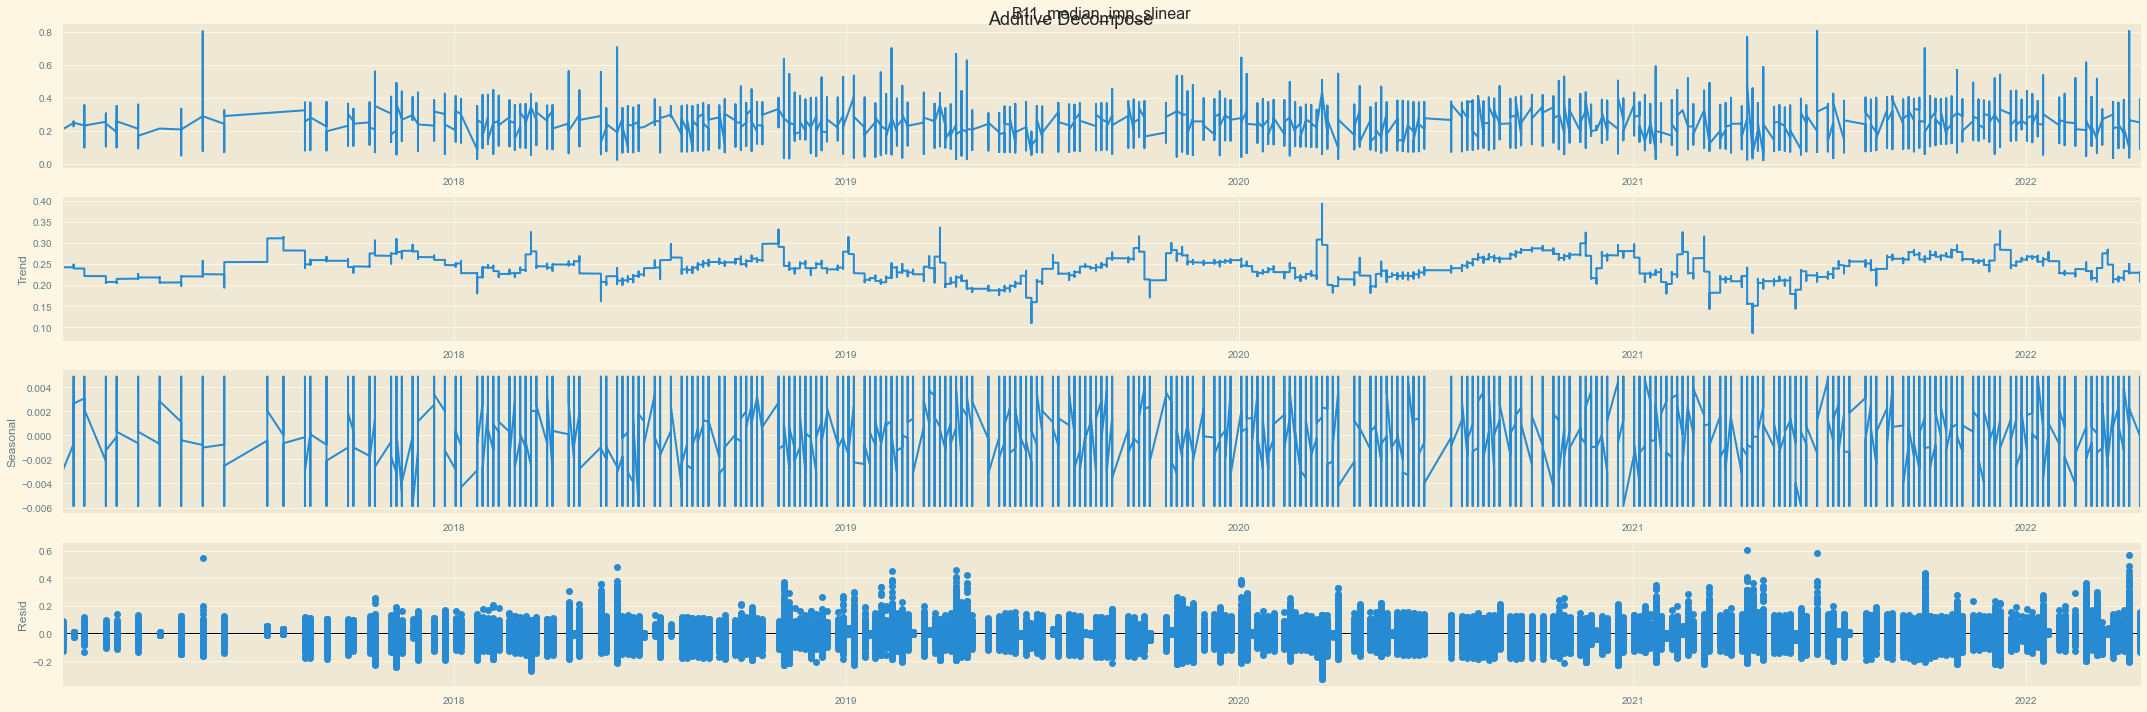

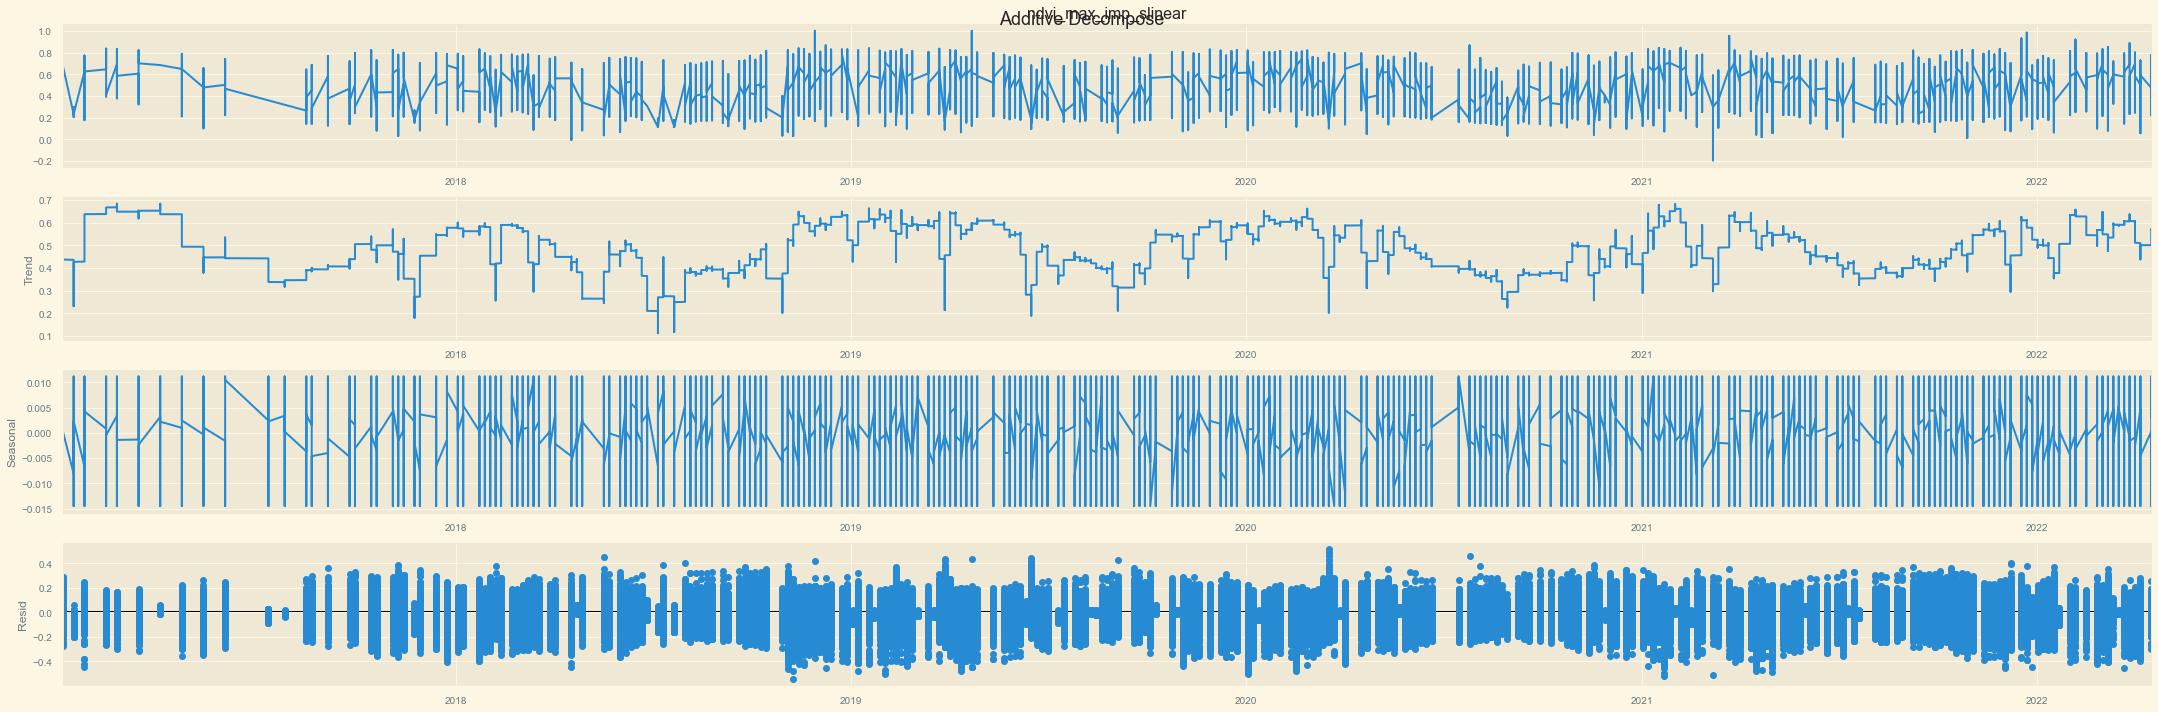

In [133]:
# Additive Decomposition
result_add_B06 = seasonal_decompose(df_interest_extra2['B06_median_imp_slinear'], model='additive', period=365)
# Plot
plt.rcParams.update({'figure.figsize': (30,10)})
result_add_B06.plot().suptitle('Additive Decompose', fontsize=18)
plt.show()
#########################################
# Additive Decomposition
result_add_B11 = seasonal_decompose(df_interest_extra2['B11_median_imp_slinear'], model='additive', period=365)
# Plot
plt.rcParams.update({'figure.figsize': (30,10)})
result_add_B11.plot().suptitle('Additive Decompose', fontsize=18)
plt.show()
#########################################
# Additive Decomposition
result_add_ndvi_max = seasonal_decompose(df_interest_extra2['ndvi_max_imp_slinear'], model='additive', period=365)
# Plot
plt.rcParams.update({'figure.figsize': (30,10)})
result_add_ndvi_max.plot().suptitle('Additive Decompose', fontsize=18)
plt.show()

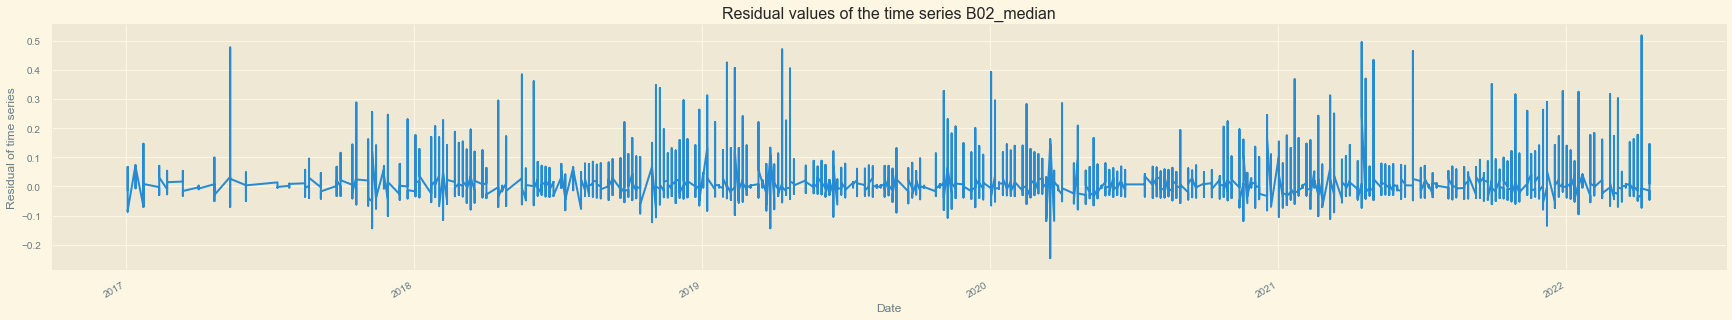

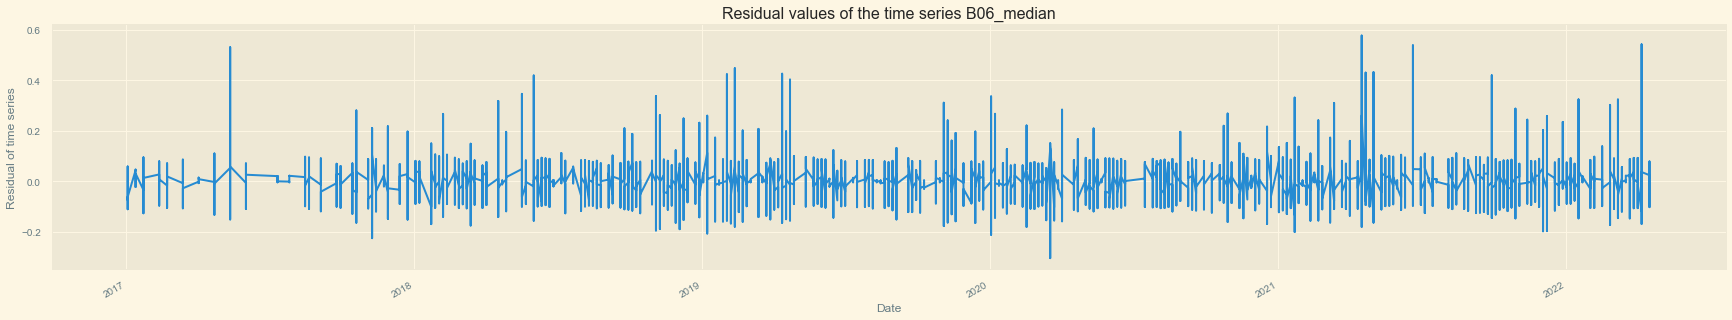

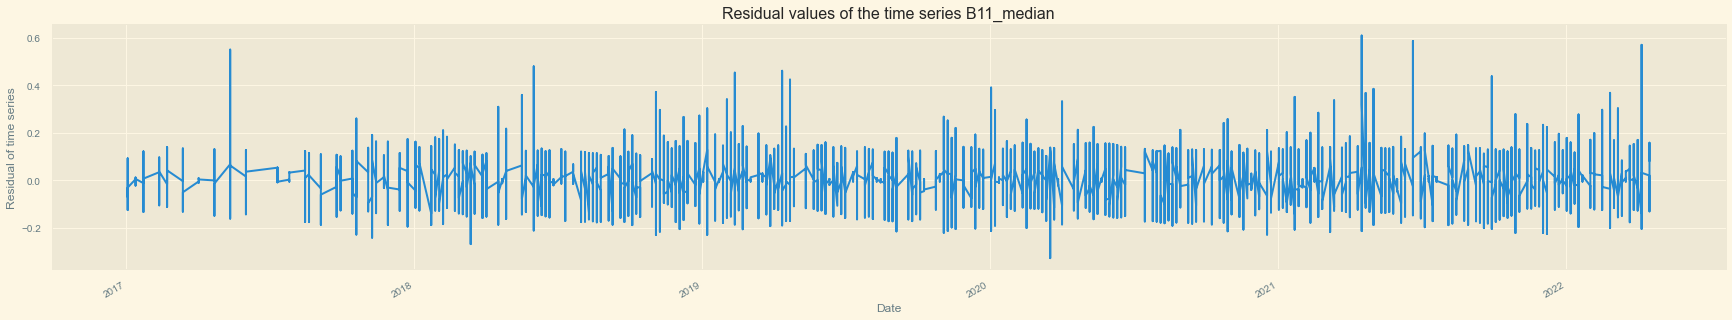

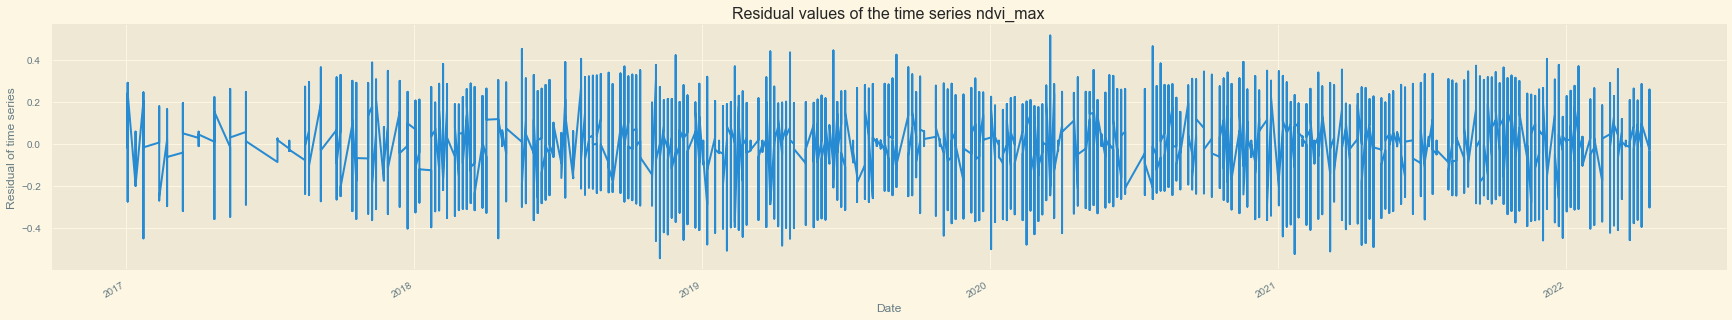

In [134]:
##########################################
##Se grafica el componente 'noise' ###
decomp_resid_B02 = result_add_B02.resid
ax = decomp_resid_B02.plot(figsize=(30, 5))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series B02_median')
plt.show()
#############
############
decomp_resid_B06 = result_add_B06.resid
ax = decomp_resid_B06.plot(figsize=(30, 5))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series B06_median')
plt.show()
#############
############
decomp_resid_B11 = result_add_B11.resid
ax = decomp_resid_B11.plot(figsize=(30, 5))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series B11_median')
plt.show()

#####
decomp_resid_ndvi_max = result_add_ndvi_max.resid
ax = decomp_resid_ndvi_max.plot(figsize=(30, 5))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series ndvi_max')
plt.show()

In [135]:
#####################################################################################
## A partir del componente "noise", se quitan aquellas observaciones con residuos extremos
###################
decomp_resid_B02=pd.DataFrame(decomp_resid_B02)
q1 = decomp_resid_B02['resid'].quantile(0.25)
q3 = decomp_resid_B02['resid'].quantile(0.75)
iqr = q3 - q1 
################
# calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr
# Generamos nueva columna
df_interest_extra2['out_B02']=np.where((decomp_resid_B02['resid'] >ls)|(decomp_resid_B02['resid'] < li),1,0)
df_interest_extra2                 

decomp_resid_B06=pd.DataFrame(decomp_resid_B06)
q1 = decomp_resid_B06['resid'].quantile(0.25)
q3 = decomp_resid_B06['resid'].quantile(0.75)
iqr = q3 - q1 
        # calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr

# Generamos nueva columna
df_interest_extra2['out_B06']=np.where((decomp_resid_B06['resid'] >ls)|(decomp_resid_B06['resid'] < li),1,0)
df_interest_extra2

decomp_resid_B11=pd.DataFrame(decomp_resid_B11)
q1 = decomp_resid_B11['resid'].quantile(0.25)
q3 = decomp_resid_B11['resid'].quantile(0.75)
iqr = q3 - q1 
# calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr
# Generamos nueva columna
df_interest_extra2['out_B11']=np.where((decomp_resid_B11['resid'] >ls)|(decomp_resid_B11['resid'] < li),1,0)
df_interest_extra2
######################################################################
decomp_resid_ndvi_max=pd.DataFrame(decomp_resid_ndvi_max)
q1 = decomp_resid_ndvi_max['resid'].quantile(0.25)
q3 = decomp_resid_ndvi_max['resid'].quantile(0.75)
iqr = q3 - q1 
# calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr
# Generamos nueva columna
df_interest_extra2['out_ndvi_max']=np.where((decomp_resid_ndvi_max['resid'] >ls)|(decomp_resid_ndvi_max['resid']< li),1,0)
df_interest_extra2
#######################################################

,B02_median,B06_median,B11_median,osm_id,ndvi_max,area_m2,raster,clouds_on_raster,id,date1,...,B11_median_imp_time,ndvi_max_imp_time,B02_median_imp_spline5,B06_median_imp_spline5,B11_median_imp_spline5,ndvi_max_imp_spline5,out_B02,out_B06,out_B11,out_ndvi_max
date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.09650,0.19910,0.18770,605976736,0.630881,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,2017-01-03,...,0.18770,0.630881,0.09650,0.19910,0.18770,0.630881,0,0,0,0
2017-01-03,0.10660,0.25960,0.25420,559322368,0.630041,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,2,2017-01-03,...,0.25420,0.630041,0.10660,0.25960,0.25420,0.630041,0,0,0,0
2017-01-03,0.11290,0.25550,0.24640,559322369,0.622036,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,3,2017-01-03,...,0.24640,0.622036,0.11290,0.25550,0.24640,0.622036,0,0,0,0
2017-01-03,0.11355,0.29300,0.26675,559328111,0.669891,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,4,2017-01-03,...,0.26675,0.669891,0.11355,0.29300,0.26675,0.669891,0,0,0,0
2017-01-03,0.12240,0.29460,0.28950,559328112,0.619112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,5,2017-01-03,...,0.28950,0.619112,0.12240,0.29460,0.28950,0.619112,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-17,0.11270,0.20520,0.18950,307532496,0.563955,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208928,2022-04-17,...,0.18950,0.563955,0.11270,0.20520,0.18950,0.563955,0,0,0,0
2022-04-17,0.13665,0.23835,0.27315,307535460,0.490798,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208929,2022-04-17,...,0.27315,0.490798,0.13665,0.23835,0.27315,0.490798,0,0,0,0
2022-04-17,0.10625,0.22425,0.22230,307796387,0.566516,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208930,2022-04-17,...,0.22230,0.566516,0.10625,0.22425,0.22230,0.566516,0,0,0,0


In [139]:
df_interest_extra2_=df_interest_extra2[['id','date1','month','B02_median_imp_slinear','B06_median_imp_slinear',
                                        'B11_median_imp_slinear','ndvi_max_imp_slinear',
                                        'out_B02','out_B06','out_B11','out_ndvi_max',
                                        'osm_id','area_m2','raster','clouds_on_raster']]
######
df_interest_extra2_
#######
df_interest_extra2_['cant_var_outl']= df_interest_extra2['out_B02']+df_interest_extra2_['out_B06']+df_interest_extra2_['out_B11']+df_interest_extra2_['out_ndvi_max']
df_interest_extra2_['cant_var_outl'].value_counts()

C:\Users\Varios\AppData\Local\Temp\ipykernel_13256\1374324725.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest_extra2_['cant_var_outl']= df_interest_extra2['out_B02']+df_interest_extra2_['out_B06']+df_interest_extra2_['out_B11']+df_interest_extra2_['out_ndvi_max']


0    181975
1     14235
2      6879
3      4100
4      1743
Name: cant_var_outl, dtype: int64

In [140]:
# Se quitan aquellos registros donde se observa que para las tres bandas bajo análisis, los valores son outliers
df_interest_extra3_ = df_interest_extra2_[~((df_interest_extra2['out_B02']==1) & 
                                  (df_interest_extra2_['out_B06']==1) & 
                                  (df_interest_extra2_['out_B11']==1)& 
                                  (df_interest_extra2_['out_ndvi_max']==1))]
len(df_interest_extra3_)
df_interest_extra3_

,id,date1,month,B02_median_imp_slinear,B06_median_imp_slinear,B11_median_imp_slinear,ndvi_max_imp_slinear,out_B02,out_B06,out_B11,out_ndvi_max,osm_id,area_m2,raster,clouds_on_raster,cant_var_outl
date,,,,,,,,,,,,,,,,
2017-01-03,1,2017-01-03,1,0.09650,0.19910,0.18770,0.630881,0,0,0,0,605976736,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0
2017-01-03,2,2017-01-03,1,0.10660,0.25960,0.25420,0.630041,0,0,0,0,559322368,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0
2017-01-03,3,2017-01-03,1,0.11290,0.25550,0.24640,0.622036,0,0,0,0,559322369,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0
2017-01-03,4,2017-01-03,1,0.11355,0.29300,0.26675,0.669891,0,0,0,0,559328111,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0
2017-01-03,5,2017-01-03,1,0.12240,0.29460,0.28950,0.619112,0,0,0,0,559328112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-17,208928,2022-04-17,4,0.11270,0.20520,0.18950,0.563955,0,0,0,0,307532496,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,0
2022-04-17,208929,2022-04-17,4,0.13665,0.23835,0.27315,0.490798,0,0,0,0,307535460,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,0
2022-04-17,208930,2022-04-17,4,0.10625,0.22425,0.22230,0.566516,0,0,0,0,307796387,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,0


In [141]:
#La cantidad de observaciones que se quitan a partir del análisis del ruido es  208932-206757 =2175

<AxesSubplot:>

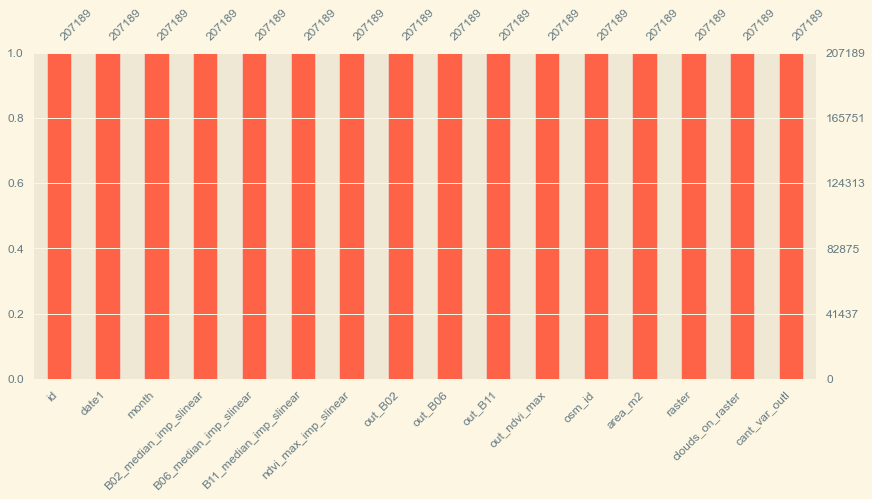

In [142]:
msno.bar(df_interest_extra3_,figsize=(14,6), sort="ascending",fontsize=12, color='tomato') 

<AxesSubplot:xlabel='clouds_on_raster', ylabel='Count'>

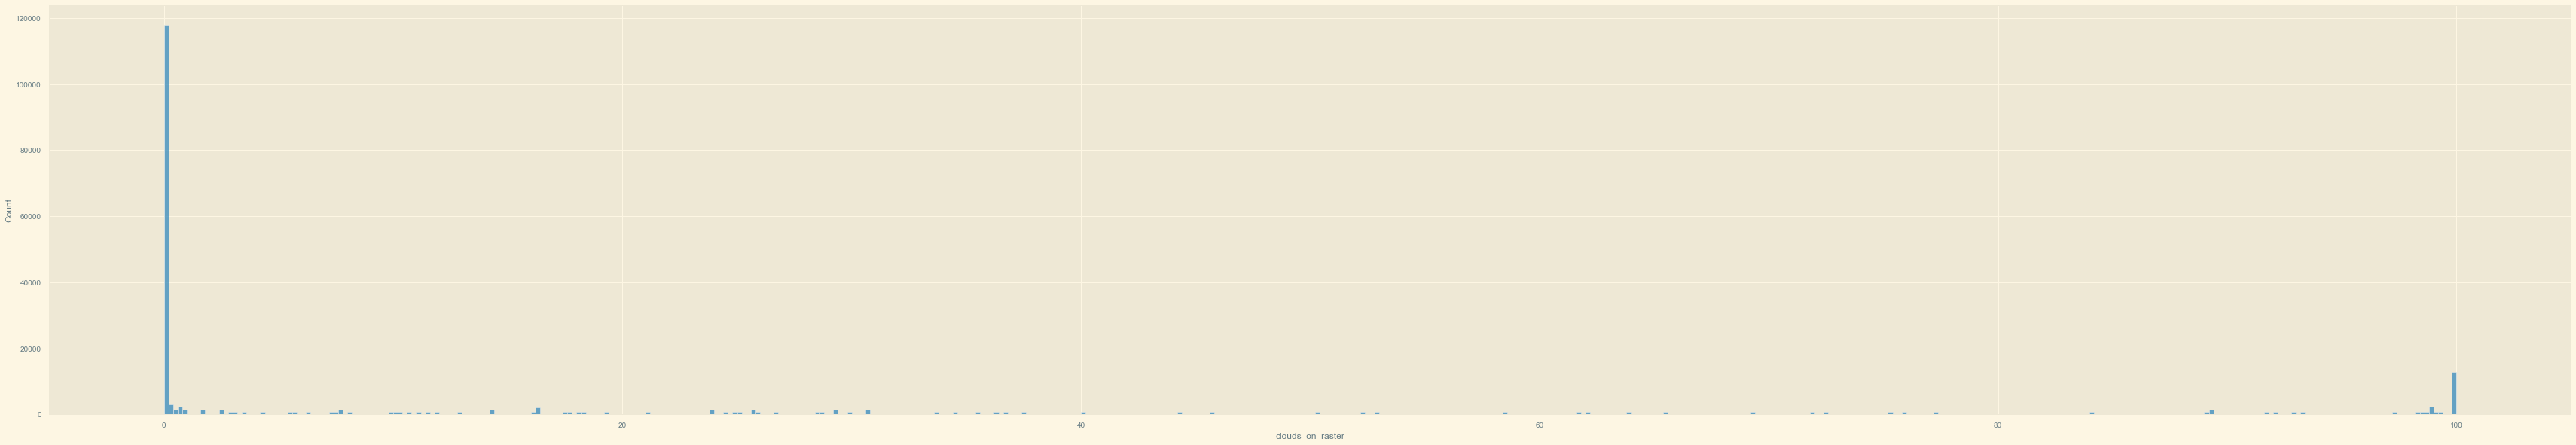

In [143]:
import seaborn as sns
plt.figure(figsize=(60,10))
sns.histplot(data=df_interest_extra3_['clouds_on_raster'],binwidth=0.2)

In [144]:
# Filtrar por nubosidad < 10%
df_interest_extra4=df_interest_extra3_[df_interest_extra3_['clouds_on_raster']<10]
len(df_interest_extra4)

138598

In [145]:
df_interest_extra5=df_interest_extra3_[df_interest_extra3_['clouds_on_raster']<40]
len(df_interest_extra5)
df_interest_extra5.columns

Index(['id', 'date1', 'month', 'B02_median_imp_slinear',
       'B06_median_imp_slinear', 'B11_median_imp_slinear',
       'ndvi_max_imp_slinear', 'out_B02', 'out_B06', 'out_B11', 'out_ndvi_max',
       'osm_id', 'area_m2', 'raster', 'clouds_on_raster', 'cant_var_outl'],
      dtype='object')

In [146]:
###Normalización de las variables bajo análisis en el rango 0,1
###################
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
df_interest_extra4[['B02_median_imp_slinear_scl','B06_median_imp_slinear_scl',
                              'B11_median_imp_slinear_scl',
                              'ndvi_max_imp_slinear_scl',
                               'clouds_on_raster_scl']] = scaler.fit_transform(df_interest_extra4[['B02_median_imp_slinear',
                              'B06_median_imp_slinear',
                              'B11_median_imp_slinear',
                              'ndvi_max_imp_slinear',
                               'clouds_on_raster']])
df_interest_extra4

C:\Users\Varios\AppData\Local\Temp\ipykernel_13256\2672752812.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest_extra4[['B02_median_imp_slinear_scl','B06_median_imp_slinear_scl',
C:\Users\Varios\anaconda3\lib\site-packages\pandas\core\indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,id,date1,month,B02_median_imp_slinear,B06_median_imp_slinear,B11_median_imp_slinear,ndvi_max_imp_slinear,out_B02,out_B06,out_B11,...,osm_id,area_m2,raster,clouds_on_raster,cant_var_outl,B02_median_imp_slinear_scl,B06_median_imp_slinear_scl,B11_median_imp_slinear_scl,ndvi_max_imp_slinear_scl,clouds_on_raster_scl
date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,1,2017-01-03,1,0.09650,0.19910,0.18770,0.630881,0,0,0,...,605976736,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0,0.060755,0.294198,0.272254,0.622545,0.0
2017-01-03,2,2017-01-03,1,0.10660,0.25960,0.25420,0.630041,0,0,0,...,559322368,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0,0.086270,0.412779,0.383944,0.621684,0.0
2017-01-03,3,2017-01-03,1,0.11290,0.25550,0.24640,0.622036,0,0,0,...,559322369,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0,0.102185,0.404743,0.370843,0.613474,0.0
2017-01-03,4,2017-01-03,1,0.11355,0.29300,0.26675,0.669891,0,0,0,...,559328111,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0,0.103827,0.478244,0.405022,0.662556,0.0
2017-01-03,5,2017-01-03,1,0.12240,0.29460,0.28950,0.619112,0,0,0,...,559328112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0,0.126184,0.481380,0.443231,0.610475,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-17,208928,2022-04-17,4,0.11270,0.20520,0.18950,0.563955,0,0,0,...,307532496,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,0,0.101680,0.306154,0.275277,0.553904,0.0
2022-04-17,208929,2022-04-17,4,0.13665,0.23835,0.27315,0.490798,0,0,0,...,307535460,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,0,0.162183,0.371129,0.415771,0.478870,0.0
2022-04-17,208930,2022-04-17,4,0.10625,0.22425,0.22230,0.566516,0,0,0,...,307796387,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,0,0.085386,0.343493,0.330366,0.556530,0.0


In [185]:
## se guarda el archivo con los datos imputados bajo interpolación slinear, 
#identificación de outliers a partir del análisis del ruido 
#y normalización con MaxminScaler y por último filtrado por nubosidad menor a 10%
from pathlib import Path  
#filepath = Path('Resultado_tp1/DF.csv') 
filepath = Path('C:/Users/Varios/Desktop/Diplodatos/Resultado_receta_extra2.csv') 
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_interest_extra4.to_csv(filepath) 

In [148]:
##análisis extra
## se analizan distribuciones de los datos de nuevo, luego de las transformaciones

In [149]:
df_interest_extra4.columns

Index(['id', 'date1', 'month', 'B02_median_imp_slinear',
       'B06_median_imp_slinear', 'B11_median_imp_slinear',
       'ndvi_max_imp_slinear', 'out_B02', 'out_B06', 'out_B11', 'out_ndvi_max',
       'osm_id', 'area_m2', 'raster', 'clouds_on_raster', 'cant_var_outl',
       'B02_median_imp_slinear_scl', 'B06_median_imp_slinear_scl',
       'B11_median_imp_slinear_scl', 'ndvi_max_imp_slinear_scl',
       'clouds_on_raster_scl'],
      dtype='object')

<AxesSubplot:>

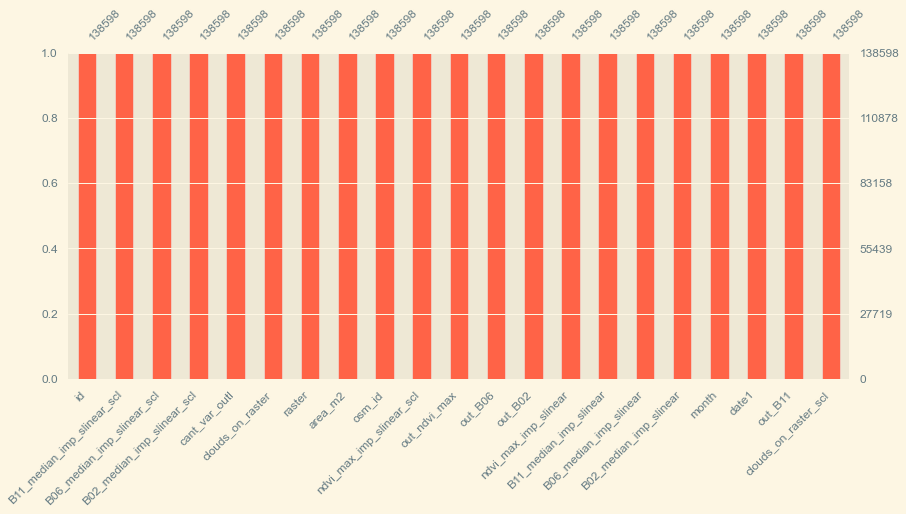

In [150]:
msno.bar(df_interest_extra4,figsize=(14,6), sort="ascending",fontsize=12, color='tomato') 

<Figure size 2160x720 with 0 Axes>

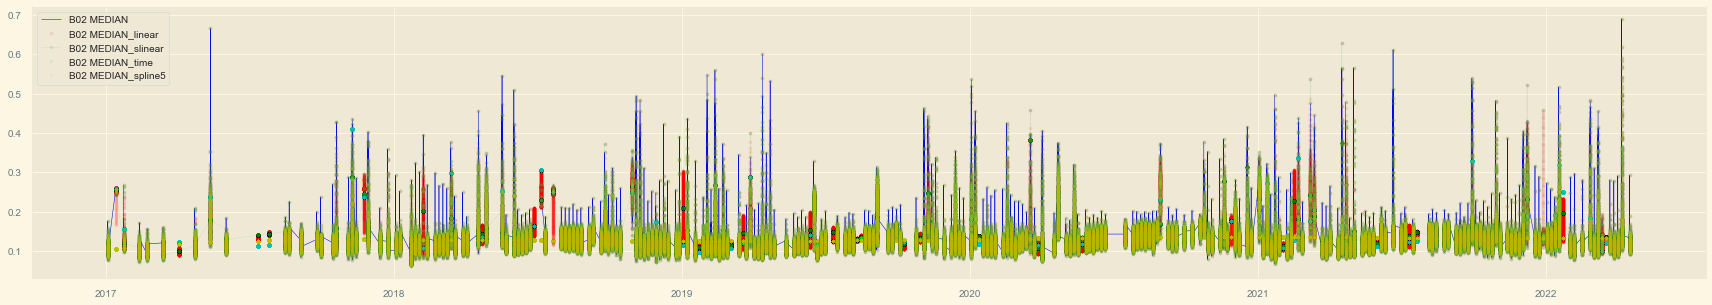

<Figure size 2160x720 with 0 Axes>

In [180]:
# using the style for the plot
########  
plt.figure(figsize=(30,5))
from matplotlib import style
plt.plot(df_interest_A1['B02_median'], 'b-', label = 'B02 MEDIAN',linewidth=0.5,alpha=1)
plt.plot(df_interest_extra2['B02_median_imp_linear'], 'r.', label = 'B02 MEDIAN_linear',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['B02_median_imp_slinear'], 'g.-', label = 'B02 MEDIAN_slinear',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['B02_median_imp_time'], 'c.', label = 'B02 MEDIAN_time',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['B02_median_imp_spline5'], 'y.', label = 'B02 MEDIAN_spline5',linewidth=0.5,alpha=0.1)
plt.legend()
plt.figure()

<Figure size 2160x720 with 0 Axes>

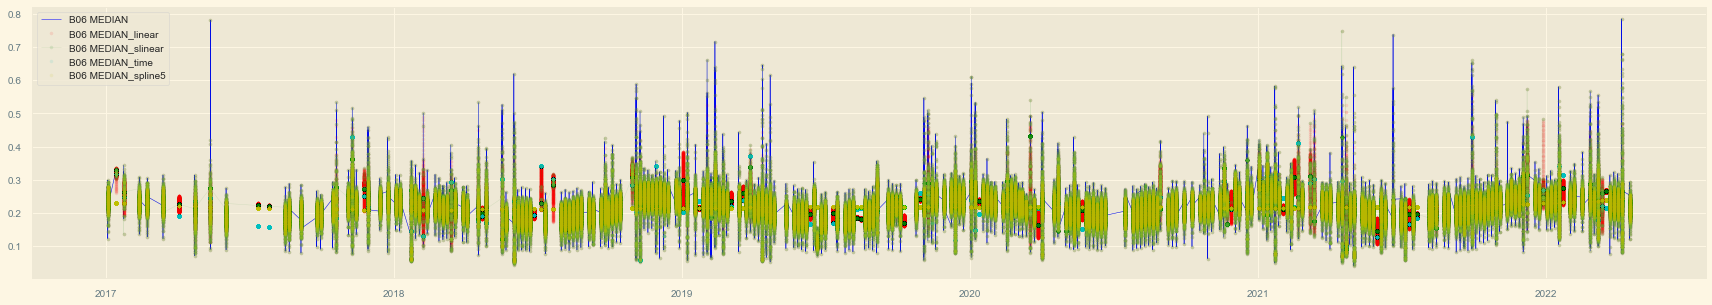

<Figure size 2160x720 with 0 Axes>

In [181]:
# using the style for the plot
########  
plt.figure(figsize=(30,5))
from matplotlib import style
plt.plot(df_interest_A1['B06_median'], 'b-', label = 'B06 MEDIAN',linewidth=0.5,alpha=1)
plt.plot(df_interest_extra2['B06_median_imp_linear'], 'r.', label = 'B06 MEDIAN_linear',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['B06_median_imp_slinear'], 'g.-', label = 'B06 MEDIAN_slinear',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['B06_median_imp_time'], 'c.', label = 'B06 MEDIAN_time',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['B06_median_imp_spline5'], 'y.', label = 'B06 MEDIAN_spline5',linewidth=0.5,alpha=0.1)
plt.legend()
plt.figure()

<Figure size 2160x720 with 0 Axes>

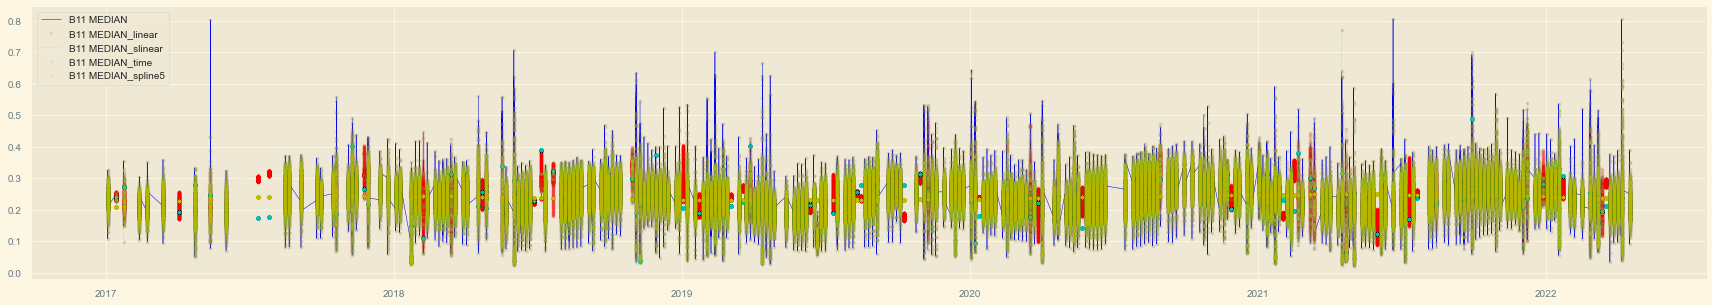

<Figure size 2160x720 with 0 Axes>

In [182]:
# using the style for the plot
########  
plt.figure(figsize=(30,5))
from matplotlib import style
plt.plot(df_interest_A1['B11_median'], 'b-', label = 'B11 MEDIAN',linewidth=0.5,alpha=1)
plt.plot(df_interest_extra2['B11_median_imp_linear'], 'r.', label = 'B11 MEDIAN_linear',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['B11_median_imp_slinear'], 'g-.', label = 'B11 MEDIAN_slinear',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['B11_median_imp_time'], 'c.', label = 'B11 MEDIAN_time',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['B11_median_imp_spline5'], 'y.', label = 'B11 MEDIAN_spline5',linewidth=0.5,alpha=0.1)
plt.legend()
plt.figure()

<Figure size 2160x720 with 0 Axes>

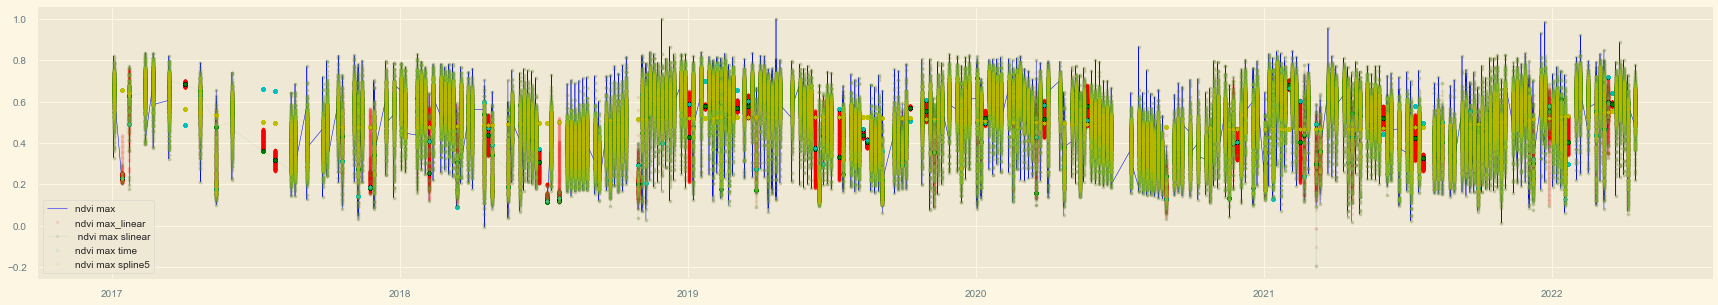

<Figure size 2160x720 with 0 Axes>

In [183]:
# using the style for the plot
########  
plt.figure(figsize=(30,5))
from matplotlib import style
plt.plot(df_interest_A1['ndvi_max'], 'b-', label = 'ndvi max',linewidth=0.5,alpha=1)
plt.plot(df_interest_extra2['ndvi_max_imp_linear'], 'r.', label = 'ndvi max_linear',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['ndvi_max_imp_slinear'], 'g.-', label = ' ndvi max slinear',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['ndvi_max_imp_time'], 'c.', label = 'ndvi max time',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['ndvi_max_imp_spline5'], 'y.', label = 'ndvi max spline5',linewidth=0.5,alpha=0.1)
plt.legend()
plt.figure()

In [184]:
####Se observa que quitando las observaciones que tienen simultáneamente outliers en B02_median, B06_median, B11_median y ndvi_max, cambia poco la distribución. No obstante dado que es una serie de tiempo, quizás no sea el 

###Si se quitan las observaciones donde por lo menos dos variables tienen outliers, el resultado es el siguiente:

In [ ]:
df_interest_extra3_ = df_interest_extra2_[df_interest_extra2_['cant_var_outl']<3]
len(df_interest_extra3_)

In [ ]:
# Filtrar por nubosidad < 10%
df_interest_extra4=df_interest_extra3_[df_interest_extra3_['clouds_on_raster']<10]
len(df_interest_extra4)

In [ ]:
###Normalización de las variables bajo análisis en el rango 0,1
###################
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
df_interest_extra4[['B02_median_imp_spline5_scl','B06_median_imp_spline5_scl',
                              'B11_median_imp_spline5_scl',
                              'ndvi_max_imp_spline5_scl',
                               'clouds_on_raster_scl']] = scaler.fit_transform(df_interest_extra4[['B02_median_imp_spline5',
                              'B06_median_imp_spline5',
                              'B11_median_imp_spline5',
                              'ndvi_max_imp_spline5',
                               'clouds_on_raster']])
